In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [211]:
df = pd.read_csv("../data/cleaned/cleaned_bestseller.csv")
df.head(5)

,Author,Year,User Rating,Reviews,Name,Price,Genre
0,Abraham Verghese,2010,4.6,4866,Cutting for Stone,11.0,Fiction
1,Abraham Verghese,2011,4.6,4866,Cutting for Stone,11.0,Fiction
2,Adam Gasiewski,2017,4.4,3113,Milk and Vine: Inspirational Quotes From Class...,6.0,Non Fiction
3,Adam Mansbach,2011,4.8,9568,Go the F**k to Sleep,9.0,Fiction
4,Adir Levy,2019,4.8,8170,What Should Danny Do? (The Power to Choose Ser...,13.0,Fiction


In [212]:
df.shape

(538, 7)

### Wie sind die Autoren verteilt?

<Axes: xlabel='Year', ylabel='count'>

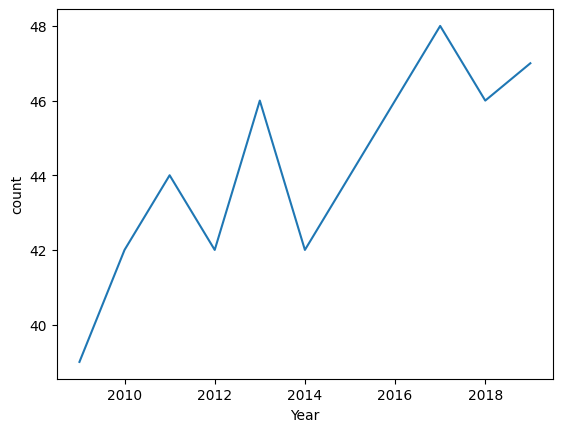

In [239]:
import seaborn as sns
df_gorupby_author_year_count = df[["Author", "Year"]].groupby("Year").value_counts().to_frame()


df_gorupby_author_year_count.reset_index(inplace=True)

df_gorupby_author_year_count["Year"].value_counts()

sns.lineplot(df_gorupby_author_year_count["Year"].value_counts())

In [ ]:
author_counts = df['Author'].value_counts()

mask = df['Author'].isin(author_counts[author_counts > 3].index)

sorted_authors = author_counts.sort_values(ascending=False).index
df['Author'] = pd.Categorical(df['Author'], categories=sorted_authors, ordered=True)

sns.barplot()

<Axes: xlabel='count', ylabel='Count'>

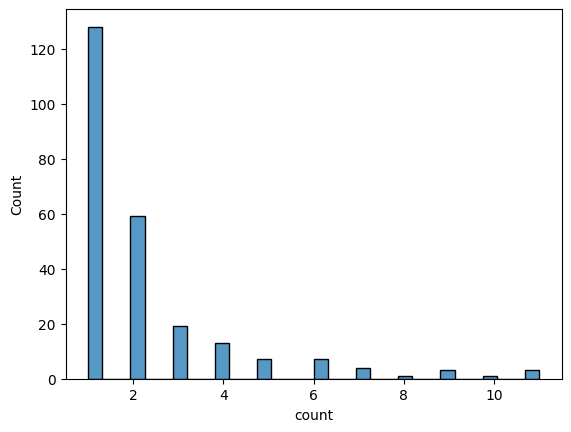

In [241]:
author_counts = df["Author"].value_counts()
author_counts = author_counts.reset_index()

sns.histplot(author_counts, x="count")

### Welche Autoren tauchen am häufigsten auf?

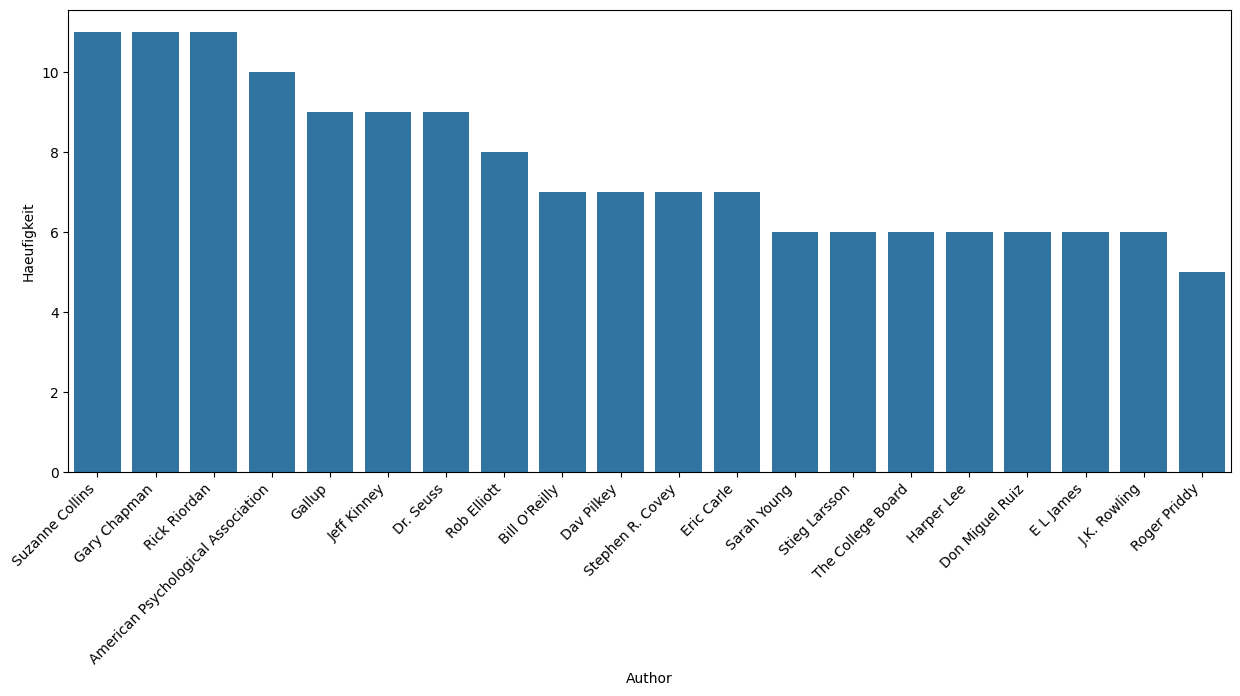

In [213]:
df_frequency_authors =  df.groupby("Author", as_index=False).agg(Haeufigkeit=("Name", "count")).sort_values("Haeufigkeit", ascending=False)
top_authors = df_frequency_authors.nlargest(20, "Haeufigkeit")


plt.figure(figsize=(15,6))
sns.barplot(top_authors, x="Author", y="Haeufigkeit")

plt.xticks(rotation=45, ha="right")
plt.show()

### Wie haben sich die Buchpreise über die Jahre entwickelt?

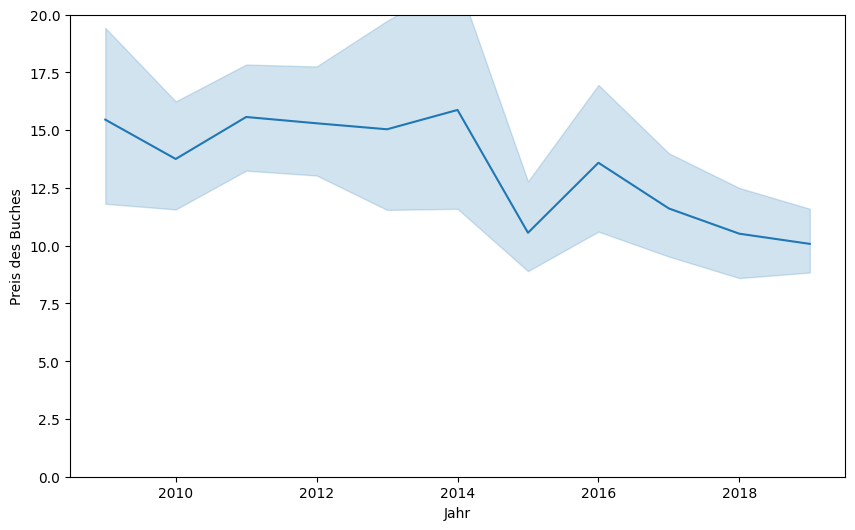

In [242]:
plt.figure(figsize=(10, 6))
sns.lineplot(df, x="Year", y="Price")

plt.xlabel("Jahr")
plt.ylabel("Preis des Buches")
plt.ylim([0, 20])


plt.show()

### Welche Bücher tauchen am häufigsten auf?

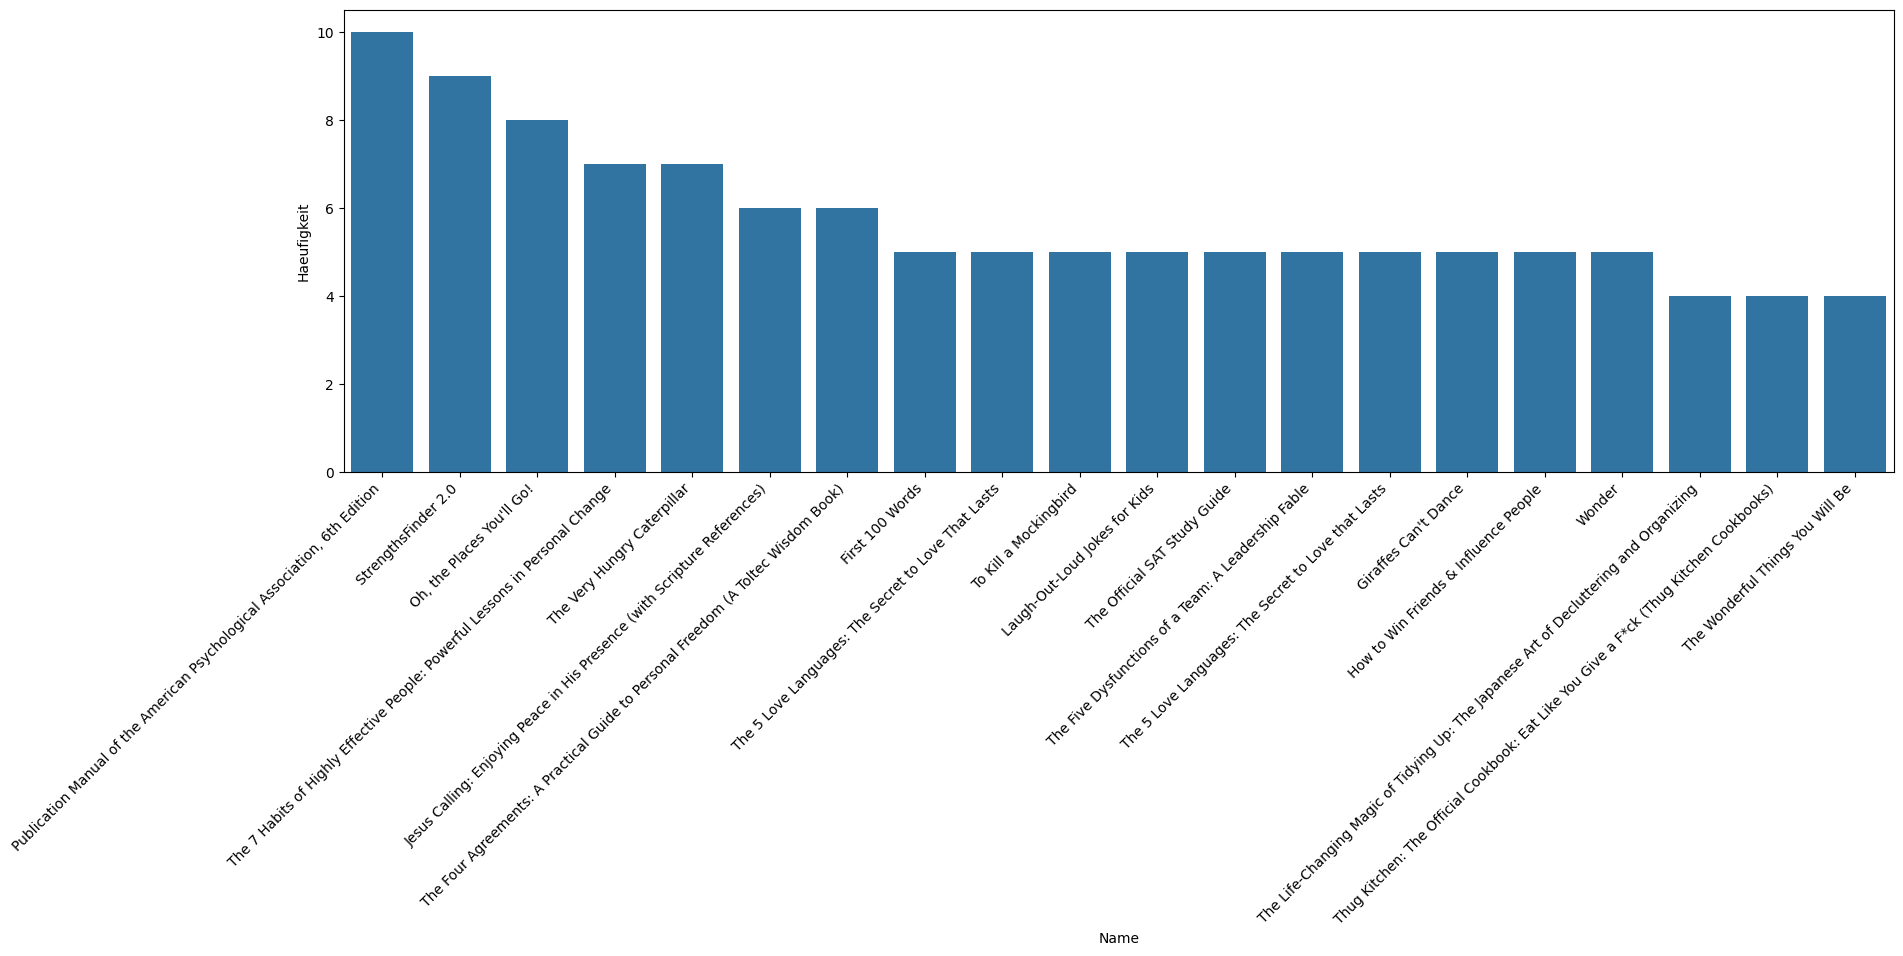

In [215]:
df_frequency_books = df.groupby("Name", as_index=False).agg(Haeufigkeit=("Name", "count")).sort_values("Haeufigkeit", ascending=False)
top_books = df_frequency_books.nlargest(20, "Haeufigkeit")

plt.figure(figsize=(20, 6))
sns.barplot(top_books, x="Name", y="Haeufigkeit")

plt.xticks(rotation=45, ha="right")
plt.show()

### Welches Genre ist beliebter? War das schon immer so?

In [216]:
px.pie(df, names="Genre")

In [217]:
genre_df = df.groupby(["Genre", "Year"], as_index=False).agg(Count=("Genre", "count"))
genre_df

,Genre,Year,Count
0,Fiction,2009,23
1,Fiction,2010,19
2,Fiction,2011,19
3,Fiction,2012,21
4,Fiction,2013,23
5,Fiction,2014,25
6,Fiction,2015,17
7,Fiction,2016,19
8,Fiction,2017,23
9,Fiction,2018,21


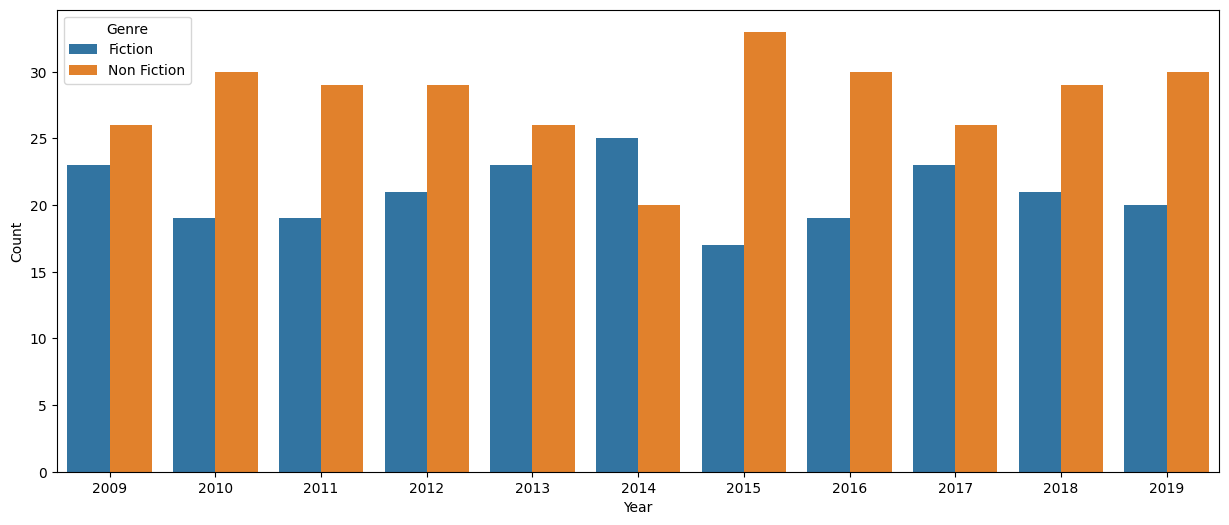

In [218]:
genre_df = df.groupby(["Genre", "Year"], as_index=False).agg(Count=("Genre", "count"))
genre_df

plt.figure(figsize=(15, 6))
sns.barplot(genre_df, x="Year", y="Count", hue="Genre")

plt.show()

In [243]:
genre = df.groupby('Year', as_index=False)['Genre'].value_counts().sort_values(by='Year')

fig = px.bar(
    genre,            
    x='Year',                
    y='count',               
    color='Genre',           
    barmode='group'          
)


fig.show()

### Wie sid die Reviews verteilt?

<Axes: xlabel='Reviews', ylabel='Count'>

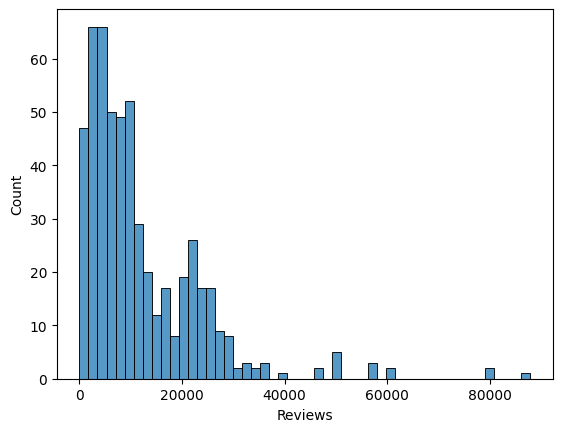

In [245]:
sns.histplot(df, x="Reviews", bins=50)

### Gibt es einen Zusammenhang zwischen Anzahl an Reviews und der Häufigkeit der Bücher in den Top 50

In [219]:
frequency_reviews_top = df.groupby(by=["Name"], as_index=False).agg(Reviews=("Reviews", "first"), Count=("Name", "count")).sort_values("Count", ascending=False)
frequency_reviews_top_20 = frequency_reviews_top.nlargest(20, "Count")
frequency_reviews_top_20

,Name,Reviews,Count
185,Publication Manual of the American Psychologic...,8580,10
203,StrengthsFinder 2.0,5069,9
172,"Oh, the Places You'll Go!",21834,8
213,The 7 Habits of Highly Effective People: Power...,9325,7
301,The Very Hungry Caterpillar,19546,7
135,Jesus Calling: Enjoying Peace in His Presence ...,19576,6
236,The Four Agreements: A Practical Guide to Pers...,23308,6
87,First 100 Words,17323,5
210,The 5 Love Languages: The Secret to Love That ...,3477,5
313,To Kill a Mockingbird,26234,5


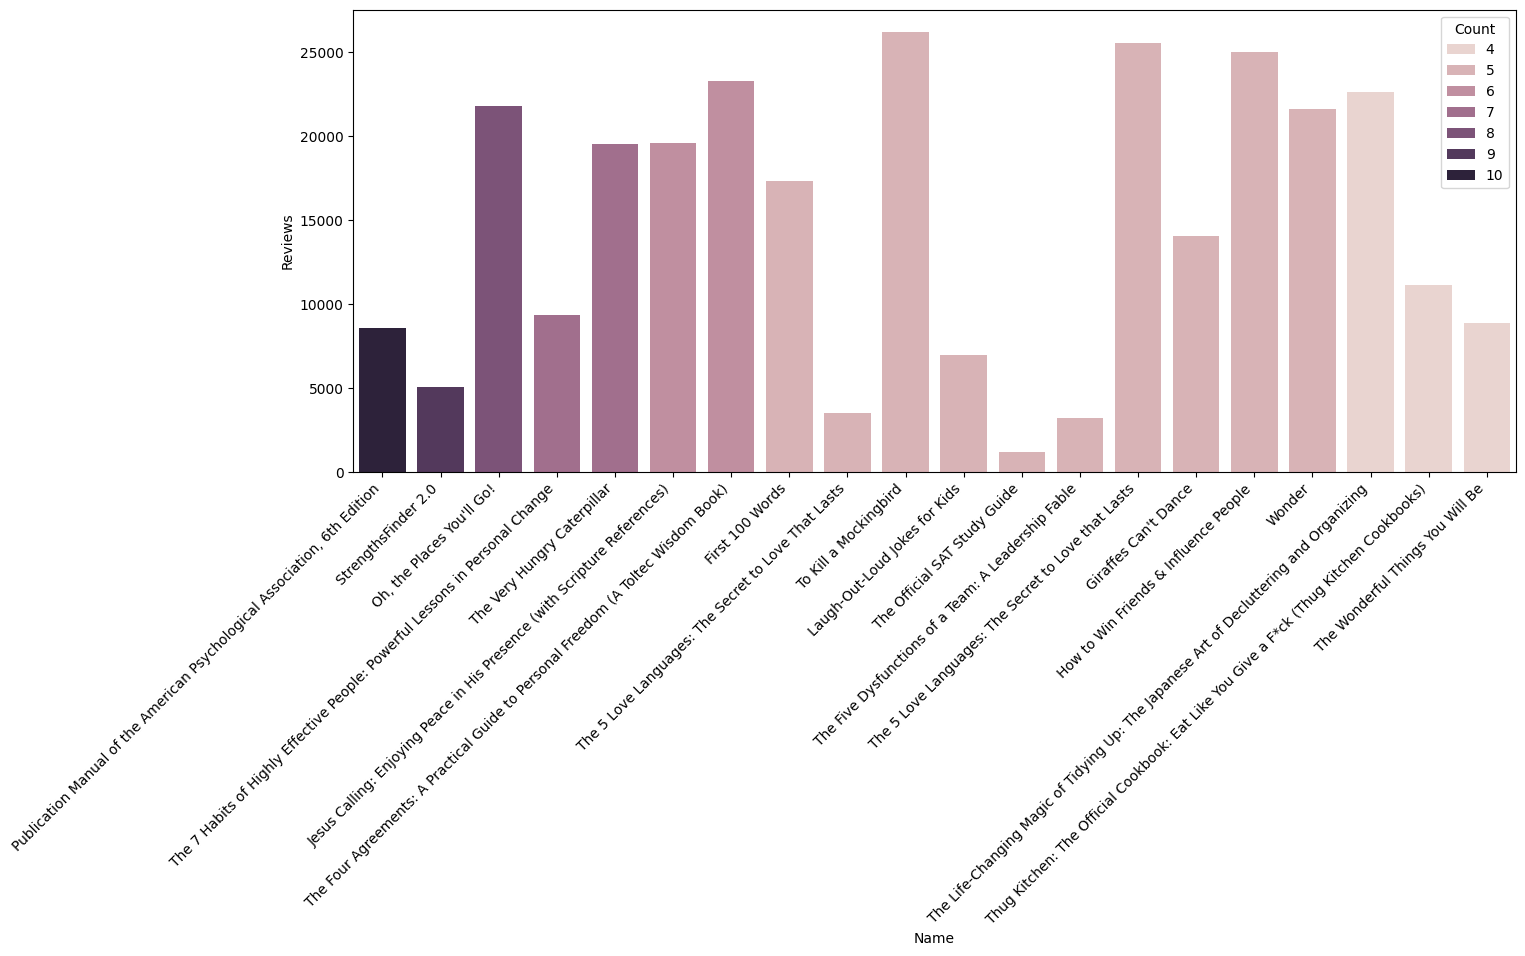

In [220]:
plt.figure(figsize=(15, 6))
sns.barplot(frequency_reviews_top_20, x="Name", y="Reviews", hue="Count")
plt.xticks(rotation=45, ha="right")
plt.show()

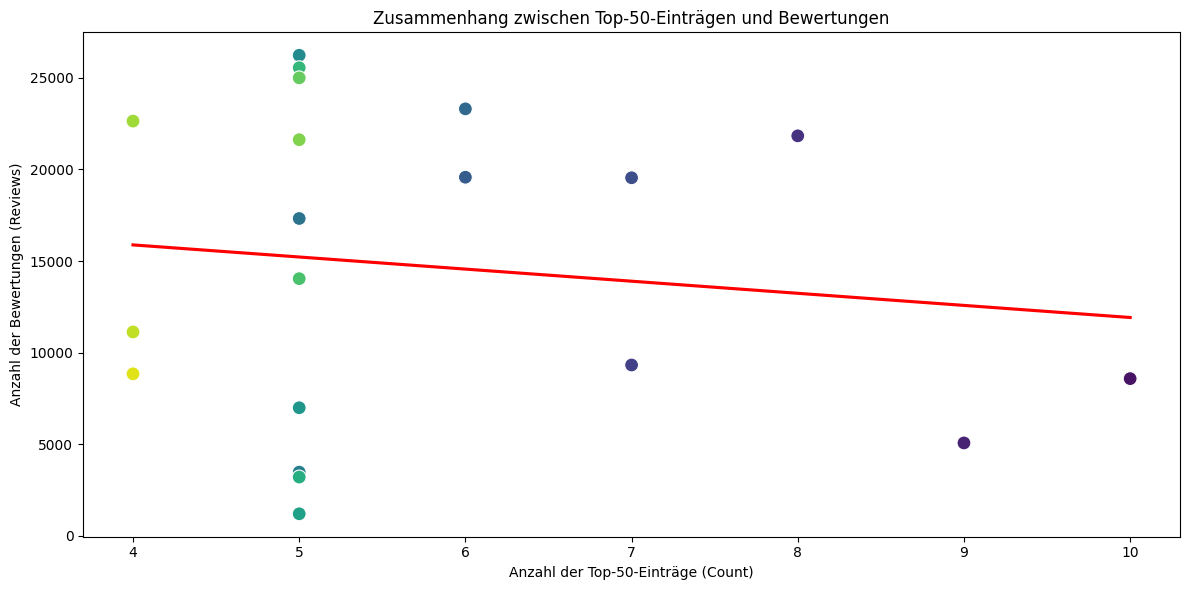

In [221]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=frequency_reviews_top_20, x="Count", y="Reviews", hue="Name",palette="viridis", s=100)
sns.regplot(data=frequency_reviews_top_20, x="Count", y="Reviews", scatter=False, color="red", ci=None)

plt.title("Zusammenhang zwischen Top-50-Einträgen und Bewertungen")
plt.xlabel("Anzahl der Top-50-Einträge (Count)")
plt.ylabel("Anzahl der Bewertungen (Reviews)")

# Legende ausblenden
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


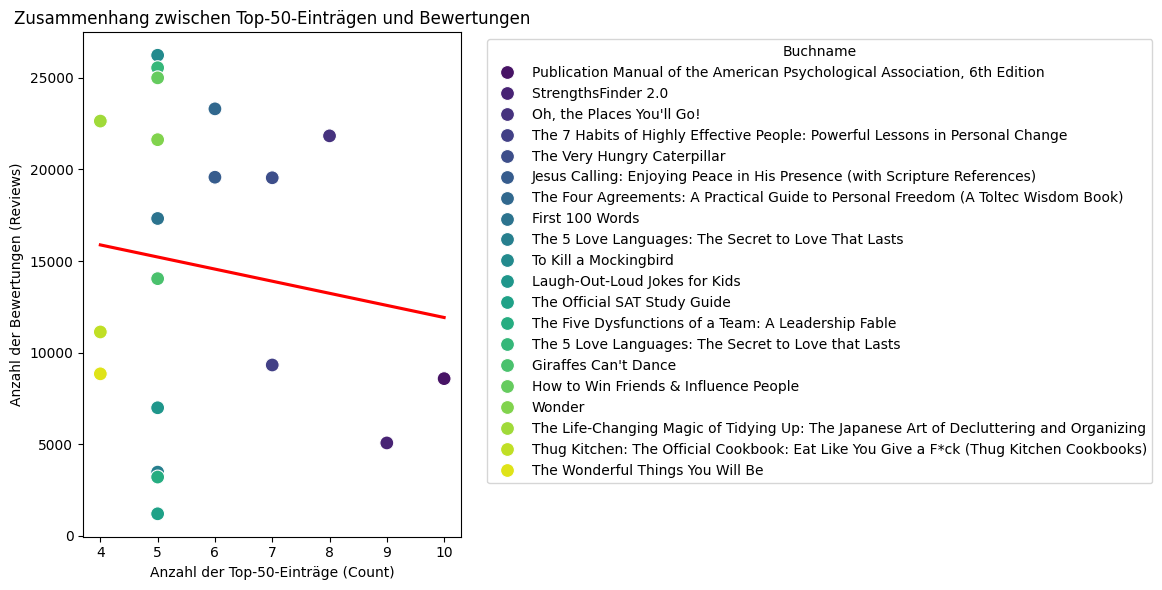

In [222]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=frequency_reviews_top_20, x="Count", y="Reviews", hue="Name", palette="viridis", s=100)
sns.regplot(data=frequency_reviews_top_20, x="Count", y="Reviews", scatter=False, color="red", ci=None)

plt.title("Zusammenhang zwischen Top-50-Einträgen und Bewertungen")
plt.xlabel("Anzahl der Top-50-Einträge (Count)")
plt.ylabel("Anzahl der Bewertungen (Reviews)")

# Legende außerhalb platzieren
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Buchname")
plt.tight_layout()
plt.show()


### Wie sid die User Ratings verteilt?

<Axes: xlabel='User Rating', ylabel='Count'>

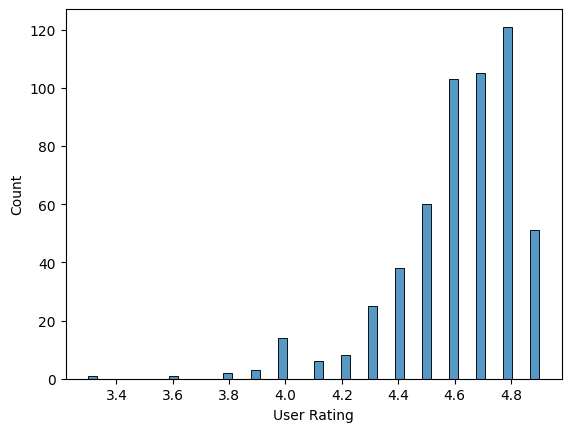

In [223]:
sns.histplot(df, x="User Rating", bins=50)

### Wie sid die Reviews verteilt?

<Axes: xlabel='Reviews', ylabel='Count'>

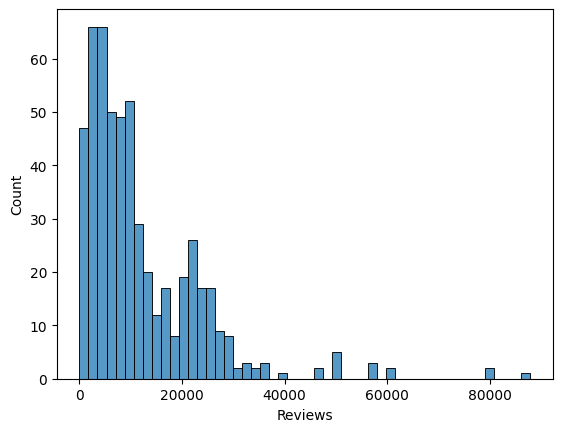

In [224]:
sns.histplot(df, x="Reviews", bins=50)

### Gibt es einen Zusammenhang zwischen Preis und Anzahl der Reviews?

In [225]:
price_reviews_df = df.groupby("Price", as_index=False).agg(mean_reviews=("Reviews", "mean")).sort_values("mean_reviews", ascending=False)
price_reviews_df

,Price,mean_reviews
33,39.0,35799.000000
16,14.5,29673.000000
11,11.0,17951.828571
17,15.0,17603.666667
8,8.0,17301.431373
6,7.0,16007.666667
30,30.0,15280.200000
20,18.0,14743.769231
7,7.5,13871.000000
28,27.0,13474.000000


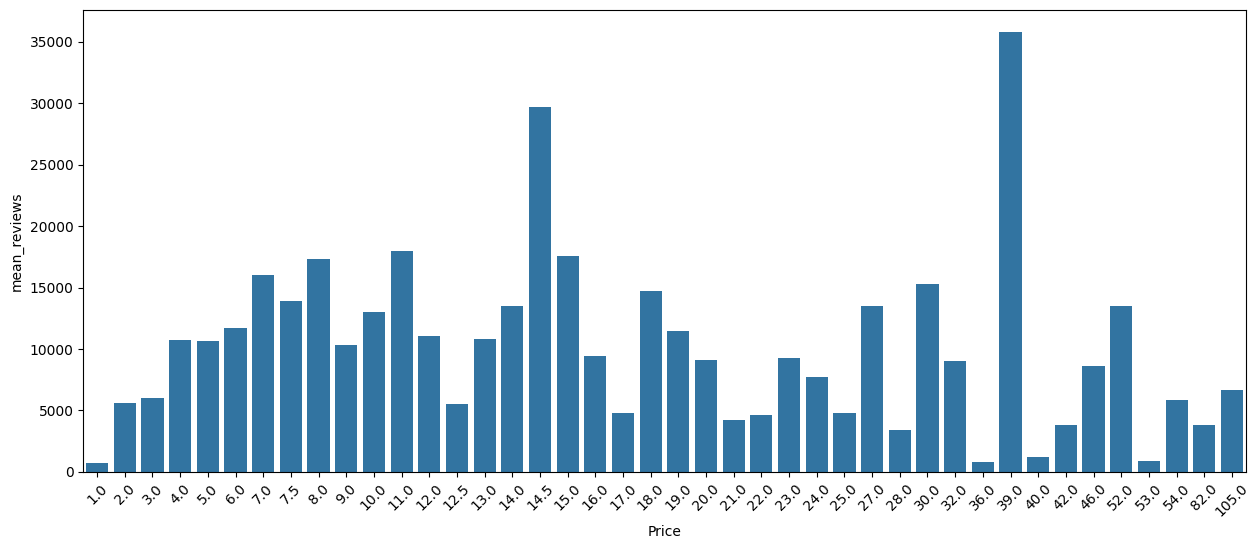

In [226]:
plt.figure(figsize=(15, 6))
sns.barplot(price_reviews_df, x="Price", y="mean_reviews")

plt.xticks(rotation=45)

plt.show()

### Gibt es einen Zusammenhang zwischen User Rating und Reviews

In [227]:
reviews_rating_df = df.groupby("User Rating", as_index=False).agg(sum_reviews=("Reviews", "sum"), Anzahl=("Name", "count"))

<Axes: xlabel='User Rating', ylabel='sum_reviews'>

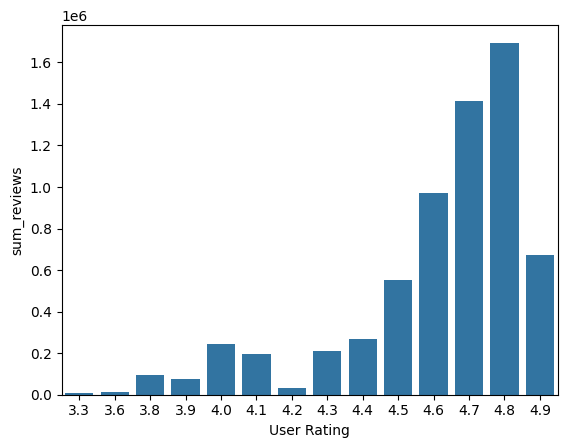

In [228]:
sns.barplot(reviews_rating_df, x="User Rating", y="sum_reviews")

<Axes: xlabel='User Rating', ylabel='Reviews'>

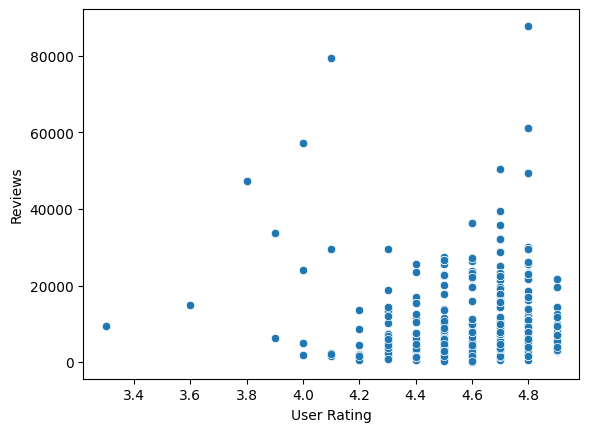

In [229]:
sns.scatterplot(df, x="User Rating", y="Reviews")

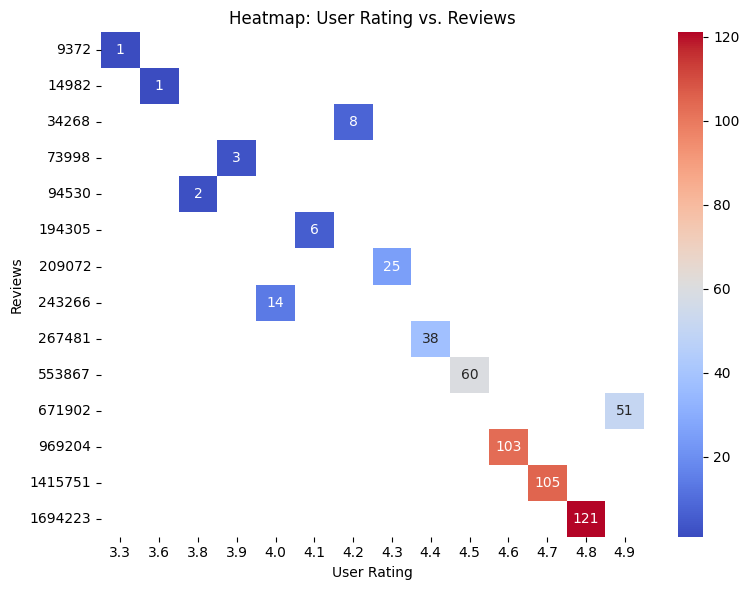

In [237]:
# Pivot-Tabelle erstellen (Kreuztabelle)
pivot = reviews_rating_df.pivot_table(values="Anzahl", index="sum_reviews", columns="User Rating")

# Heatmap erstellen
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Heatmap: User Rating vs. Reviews")
plt.xlabel("User Rating")
plt.ylabel("Reviews")
plt.tight_layout()
plt.show()